In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import seaborn as sns
import plotly.express as px

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset, calculate_metrics_for_dataset_mp

print(tf.__version__)

2.13.0


In [31]:
# DATASETS = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = [
    "BasicMotions", "NATOPS", "UWaveGestureLibrary",
    'ArticularyWordRecognition', 'Cricket', 'Epilepsy', 'PenDigits', 'PEMS-SF', 'RacketSports', 'SelfRegulationSCP1'
]
MO_UTILITY = np.array([0.1, 0.4*0.7, 0.6*0.7, 0.2])
model_to_explain = "cls_basic_train"
osc_names = {"AE": "ae_basic_train", "IF": "if_basic_train", "LOF": "lof_basic_train"}
methods = {
    # Comparison between single objective and multi objective ordered by same weights
    "comte": "COMTE",
    "abcf": "AB-CF",
    "discox": "DiscoX",
    "d8387d902c6723a9106adc62d4fc6f327a8bd275": "MS-SpaCE",
}

# Get results

In [32]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculators, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculators
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods, model_to_explain,
        data_tuple, original_classes, model, outlier_calculators, possible_nuns,
        mo_weights=MO_UTILITY
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
abcf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:14<00:00,  2.69it/s]


comte


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:18<00:00,  2.13it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:39<00:00,  1.02it/s]


discox


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:13<00:00,  3.06it/s]


Calculating metrics for NATOPS
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.43it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.23it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:44<00:00,  1.05s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.75it/s]


Calculating metrics for UWaveGestureLibrary
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.76it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:23<00:00,  4.28it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:32<00:00,  1.52s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.08it/s]


Calculating metrics for ArticularyWordRecognition
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.90it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.86it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:35<00:00,  1.55s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.54it/s]


Calculating metrics for Cricket
abcf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:38<00:00,  1.86it/s]


comte


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [00:53<00:00,  1.35it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 72/72 [04:10<00:00,  3.47s/it]


Calculating metrics for Epilepsy
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.94it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.26it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:56<00:00,  1.17s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:33<00:00,  2.99it/s]


Calculating metrics for PenDigits
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.06it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.12it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.14it/s]


Calculating metrics for PEMS-SF
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:46<00:00,  4.66s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [09:44<00:00,  5.84s/it]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [29:53<00:00, 17.94s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:03<00:00,  1.57it/s]


Calculating metrics for RacketSports
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:38<00:00,  1.58s/it]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  1.49s/it]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:59<00:00,  2.39s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.89it/s]


Calculating metrics for SelfRegulationSCP1
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  2.00it/s]


comte


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  1.97it/s]


d8387d902c6723a9106adc62d4fc6f327a8bd275


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:23<00:00,  2.64s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:29<00:00,  3.44it/s]


In [40]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


method            ii        nchanges     sparsity                 L1              L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %            times best cf index       dataset
0     AB-CF  19.5 ± 11.69  328.78 ± 170.0  0.55 ± 0.28  1257.44 ± 1157.54    89.51 ± 67.4  0.51 ± 0.11  0.68 ± 0.47  nan ± nan   0.4 ± 0.24  0.64 ± 0.27  0.86 ± 0.19  0.03 ± 0.03  0.09 ± 0.14   0.2 ± 0.28    12.33 ± 5.6    0.04 ± 0.02      0.81 ± 0.75     0.0 ± 0.0  BasicMotions
1     COMTE  19.5 ± 11.69  287.42 ± 46.32  0.48 ± 0.08   1353.76 ± 836.66  103.36 ± 60.47  0.87 ± 0.12    1.0 ± 0.0  nan ± nan  0.49 ± 0.32  0.61 ± 0.29  0.78 ± 0.24  0.14 ± 0.17  0.07 ± 0.13  0.12 ± 0.21      2.9 ± 0.5     0.01 ± 0.0   1138.65 ± 9.95     0.0 ± 0.0  BasicMotions
2  MS-SpaCE  19.5 ± 11.69  115.52 ± 81.39  0.19 ± 0.14    617.55 ± 694.74   62.91 ± 50.88   0.47 ± 0.1    1.0 ± 0.0  1.0 ± 0.0  0.34 ± 0.21  0.72 ± 0.21  0.94 ± 0.12  0.01 ± 0.02  0.11 ± 0.14   0.2 ± 0.26     6.9 ± 3.58    0.02 ± 0.01     34.45 ± 7.68   21.4 ± 21.3  BasicMotions
3    DiscoX  19.5 ± 11.69   78.75 ± 25.19  0.13 ± 0.04    460.58 ± 206.72   68.75 ± 23.75  0.34 ± 0.07    0.6 ± 0.5  nan ± nan  0.43 ± 0.14  0.73 ± 0.16  0.94 ± 0.13  0.19 ± 0.11   0.0 ± 0.01   0.0 ± 0.01  25.92 ± 18.08    0.09 ± 0.06  470.68 ± 151.86     0.0 ± 0.0  BasicMotions

NATOPS


method             ii         nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %             times  best cf index dataset
0     AB-CF  87.18 ± 53.72  919.53 ± 230.35  0.75 ± 0.19  307.74 ± 137.75  14.82 ± 6.05  0.69 ± 0.18  0.86 ± 0.35  nan ± nan  0.62 ± 0.19  0.75 ± 0.16  0.81 ± 0.17  0.09 ± 0.11   0.1 ± 0.13  0.11 ± 0.16  53.02 ± 19.52    0.09 ± 0.03       0.98 ± 0.68      0.0 ± 0.0  NATOPS
1     COMTE  87.18 ± 53.72   166.86 ± 53.52  0.14 ± 0.04    78.53 ± 60.13   7.87 ± 4.78  0.73 ± 0.16  0.92 ± 0.27  nan ± nan  0.79 ± 0.33  0.69 ± 0.19  0.76 ± 0.23  0.24 ± 0.19  0.02 ± 0.03  0.03 ± 0.04    3.27 ± 1.05     0.01 ± 0.0  1458.82 ± 192.98      0.0 ± 0.0  NATOPS
2  MS-SpaCE  87.18 ± 53.72    135.3 ± 116.8   0.11 ± 0.1    86.17 ± 95.18   7.95 ± 5.86  0.76 ± 0.14    1.0 ± 0.0  1.0 ± 0.0  0.65 ± 0.24  0.72 ± 0.16  0.79 ± 0.18   0.1 ± 0.11  0.04 ± 0.06  0.05 ± 0.08    10.34 ± 6.6    0.02 ± 0.01      35.81 ± 2.98  19.05 ± 21.05  NATOPS
3    DiscoX  87.18 ± 53.72    64.57 ± 25.84  0.05 ± 0.02    29.94 ± 24.86    6.2 ± 4.04   0.4 ± 0.09  0.07 ± 0.26  nan ± nan  0.71 ± 0.35  0.74 ± 0.21  0.79 ± 0.23  0.18 ± 0.17  0.01 ± 0.01   0.0 ± 0.01  35.86 ± 22.97    0.06 ± 0.04  1329.99 ± 261.59      0.0 ± 0.0  NATOPS

UWaveGestureLibrary


method             ii         nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %              times  best cf index              dataset
0     AB-CF  159.0 ± 87.23  406.99 ± 205.66  0.43 ± 0.22  393.43 ± 196.33  23.39 ± 7.64  0.49 ± 0.16  0.93 ± 0.26  nan ± nan  0.72 ± 0.18  0.57 ± 0.26  0.58 ± 0.24   0.2 ± 0.16  0.09 ± 0.13  0.03 ± 0.07    6.33 ± 2.91    0.01 ± 0.01         0.8 ± 0.69      0.0 ± 0.0  UWaveGestureLibrary
1     COMTE  159.0 ± 87.23  828.44 ± 171.39  0.88 ± 0.18  707.25 ± 200.53  30.68 ± 6.67  0.97 ± 0.02    1.0 ± 0.0  nan ± nan  0.45 ± 0.09   0.63 ± 0.2  0.61 ± 0.22  0.03 ± 0.06  0.14 ± 0.17  0.06 ± 0.09    2.64 ± 0.56     0.01 ± 0.0   1463.74 ± 194.95      0.0 ± 0.0  UWaveGestureLibrary
2  MS-SpaCE  159.0 ± 87.23   113.33 ± 67.24  0.12 ± 0.07   144.16 ± 80.01  14.42 ± 4.89  0.55 ± 0.15    1.0 ± 0.0  1.0 ± 0.0  0.62 ± 0.15  0.52 ± 0.23  0.58 ± 0.25   0.1 ± 0.09   0.05 ± 0.1  0.03 ± 0.05    3.12 ± 1.88     0.01 ± 0.0       66.32 ± 13.6  26.82 ± 28.91  UWaveGestureLibrary
3    DiscoX  159.0 ± 87.23   213.92 ± 82.88  0.23 ± 0.09  185.59 ± 119.82  15.63 ± 7.48  0.33 ± 0.08  0.37 ± 0.49  nan ± nan  0.72 ± 0.21  0.54 ± 0.23   0.6 ± 0.21  0.21 ± 0.19  0.08 ± 0.09  0.04 ± 0.08  29.49 ± 26.23    0.06 ± 0.06  4901.37 ± 2014.46      0.0 ± 0.0  UWaveGestureLibrary

ArticularyWordRecognition


method              ii         nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %              times best cf index                    dataset
0     AB-CF  145.05 ± 81.17  612.16 ± 258.56   0.47 ± 0.2  586.74 ± 268.06  29.33 ± 8.22  0.09 ± 0.02  0.92 ± 0.27  nan ± nan  0.74 ± 0.11  0.51 ± 0.18   0.68 ± 0.2  0.12 ± 0.11  0.07 ± 0.08   0.06 ± 0.1   17.53 ± 7.49    0.03 ± 0.01        1.22 ± 1.08     0.0 ± 0.0  ArticularyWordRecognition
1     COMTE  145.05 ± 81.17   440.72 ± 45.16  0.34 ± 0.03  446.11 ± 105.02   26.3 ± 5.26  0.16 ± 0.05   0.99 ± 0.1  nan ± nan  0.78 ± 0.16  0.47 ± 0.19  0.65 ± 0.22  0.16 ± 0.14  0.04 ± 0.06  0.04 ± 0.08    3.07 ± 0.33      0.0 ± 0.0   1133.41 ± 240.19     0.0 ± 0.0  ArticularyWordRecognition
2  MS-SpaCE  145.05 ± 81.17  230.82 ± 194.41  0.18 ± 0.15  196.36 ± 155.95   15.14 ± 6.9  0.09 ± 0.02    1.0 ± 0.0  1.0 ± 0.0   0.7 ± 0.15  0.51 ± 0.18   0.7 ± 0.19  0.07 ± 0.08  0.02 ± 0.05  0.03 ± 0.06  18.07 ± 32.74    0.03 ± 0.05      57.27 ± 17.65  15.1 ± 27.43  ArticularyWordRecognition
3    DiscoX  145.05 ± 81.17   119.17 ± 43.68  0.09 ± 0.03    82.79 ± 47.49   11.0 ± 4.43  0.08 ± 0.01  0.24 ± 0.43  nan ± nan  0.67 ± 0.15  0.54 ± 0.19  0.73 ± 0.18  0.06 ± 0.07  0.03 ± 0.03  0.02 ± 0.03  31.58 ± 22.11    0.05 ± 0.03  7757.67 ± 3714.16     0.0 ± 0.0  ArticularyWordRecognition

Cricket


method            ii           nchanges     sparsity                 L1             L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %             times  best cf index  dataset
0     AB-CF  35.5 ± 20.93  3416.05 ± 1308.48  0.48 ± 0.18   3265.18 ± 998.67  74.65 ± 14.21  0.31 ± 0.12    0.9 ± 0.3  nan ± nan  0.74 ± 0.16  0.65 ± 0.19   0.82 ± 0.3   0.09 ± 0.1  0.03 ± 0.05  0.05 ± 0.07    9.55 ± 4.93      0.0 ± 0.0       1.35 ± 1.32      0.0 ± 0.0  Cricket
1     COMTE  35.5 ± 20.93      3590.75 ± 1.9    0.5 ± 0.0   3491.58 ± 684.79  79.42 ± 10.52  0.66 ± 0.13  0.99 ± 0.12  nan ± nan  0.75 ± 0.18   0.6 ± 0.27   0.75 ± 0.3  0.12 ± 0.14  0.07 ± 0.12  0.08 ± 0.18     3.25 ± 1.9      0.0 ± 0.0  1309.57 ± 128.66      0.0 ± 0.0  Cricket
2  MS-SpaCE  35.5 ± 20.93  1600.29 ± 1537.69  0.22 ± 0.21  1476.46 ± 1242.08  47.36 ± 21.06  0.28 ± 0.08    1.0 ± 0.0  1.0 ± 0.0   0.76 ± 0.2  0.67 ± 0.19  0.86 ± 0.18   0.1 ± 0.11  0.03 ± 0.04  0.07 ± 0.12  41.69 ± 34.39    0.01 ± 0.01    220.96 ± 82.82  17.54 ± 28.18  Cricket

Epilepsy


method             ii         nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %             times best cf index   dataset
0     AB-CF  68.51 ± 38.95   284.7 ± 108.58  0.46 ± 0.18   201.06 ± 112.4  14.43 ± 5.94  0.66 ± 0.14  0.69 ± 0.46  nan ± nan  0.59 ± 0.16  0.69 ± 0.16  0.88 ± 0.14  0.02 ± 0.04   0.1 ± 0.13  0.13 ± 0.19   9.48 ± 3.32    0.03 ± 0.01       1.14 ± 1.07     0.0 ± 0.0  Epilepsy
1     COMTE  68.51 ± 38.95  475.64 ± 139.29  0.77 ± 0.23  354.77 ± 142.48  20.11 ± 6.55  0.99 ± 0.01    1.0 ± 0.0  nan ± nan  0.48 ± 0.13  0.76 ± 0.15  0.93 ± 0.09  0.05 ± 0.09  0.17 ± 0.21  0.17 ± 0.25   4.55 ± 2.05    0.01 ± 0.01  1447.82 ± 191.32     0.0 ± 0.0  Epilepsy
2  MS-SpaCE  68.51 ± 38.95    99.17 ± 57.39  0.16 ± 0.09    80.84 ± 44.02   9.44 ± 3.61  0.63 ± 0.13    1.0 ± 0.0  1.0 ± 0.0  0.61 ± 0.22   0.66 ± 0.2  0.84 ± 0.19  0.03 ± 0.04  0.04 ± 0.05  0.07 ± 0.09   6.01 ± 4.25    0.02 ± 0.01      47.11 ± 9.26  25.95 ± 25.6  Epilepsy
3    DiscoX  68.51 ± 38.95   148.58 ± 55.23  0.24 ± 0.09    114.2 ± 64.67   11.63 ± 5.3  0.45 ± 0.06  0.69 ± 0.46  nan ± nan  0.58 ± 0.18   0.7 ± 0.22  0.86 ± 0.16  0.06 ± 0.07  0.05 ± 0.06  0.07 ± 0.11  27.43 ± 31.1     0.09 ± 0.1    621.81 ± 444.1     0.0 ± 0.0  Epilepsy

PenDigits


method                 ii      nchanges     sparsity               L1             L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %             times  best cf index    dataset
0     AB-CF  1775.95 ± 1043.05  10.41 ± 3.95  0.65 ± 0.25  253.24 ± 160.75  90.82 ± 45.07  0.93 ± 0.13    0.9 ± 0.3  nan ± nan   0.3 ± 0.18  0.66 ± 0.13  0.68 ± 0.23  0.15 ± 0.18  0.05 ± 0.08  0.01 ± 0.02  3.24 ± 1.02    0.41 ± 0.13       2.04 ± 1.53      0.0 ± 0.0  PenDigits
1     COMTE  1775.95 ± 1043.05  11.93 ± 3.44  0.75 ± 0.22  249.17 ± 153.46  86.32 ± 46.02    1.0 ± 0.0   0.99 ± 0.1  nan ± nan  0.19 ± 0.09  0.73 ± 0.09  0.78 ± 0.16  0.05 ± 0.09  0.07 ± 0.09  0.02 ± 0.04  2.68 ± 1.07    0.33 ± 0.13  1125.77 ± 207.25      0.0 ± 0.0  PenDigits
2  MS-SpaCE  1775.95 ± 1043.05   4.55 ± 2.51  0.28 ± 0.16    81.46 ± 47.87  45.11 ± 19.35  0.91 ± 0.11    1.0 ± 0.0  1.0 ± 0.0  0.27 ± 0.11  0.68 ± 0.14  0.75 ± 0.17  0.11 ± 0.12  0.03 ± 0.04  0.01 ± 0.03   1.71 ± 0.8     0.21 ± 0.1      31.82 ± 3.59  43.87 ± 33.77  PenDigits
3    DiscoX  1775.95 ± 1043.05   5.74 ± 1.89  0.36 ± 0.12   172.48 ± 75.95  81.31 ± 29.57  0.52 ± 0.09  0.84 ± 0.37  nan ± nan  0.56 ± 0.24   0.6 ± 0.11  0.37 ± 0.27   0.4 ± 0.24  0.02 ± 0.04   0.0 ± 0.01  1.29 ± 0.61    0.16 ± 0.08    108.32 ± 88.39      0.0 ± 0.0  PenDigits

PEMS-SF


method            ii             nchanges     sparsity               L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS      subsequences subsequences %                times  best cf index  dataset
0     AB-CF  84.74 ± 51.5  74713.64 ± 26798.25  0.54 ± 0.19  1421.49 ± 778.7  10.55 ± 3.35  0.65 ± 0.21  0.78 ± 0.42  nan ± nan    0.5 ± 0.1  0.81 ± 0.11  0.92 ± 0.09  0.02 ± 0.03  0.04 ± 0.07  0.02 ± 0.09  1943.78 ± 505.24    0.03 ± 0.01          6.64 ± 1.22      0.0 ± 0.0  PEMS-SF
1     COMTE  84.74 ± 51.5   5067.47 ± 15650.71  0.04 ± 0.11  173.44 ± 520.99   4.48 ± 2.84  0.49 ± 0.07  0.77 ± 0.42  nan ± nan  0.54 ± 0.12  0.77 ± 0.16  0.94 ± 0.11  0.01 ± 0.02  0.01 ± 0.01   0.0 ± 0.01    52.03 ± 134.64      0.0 ± 0.0  16499.18 ± 14344.96      0.0 ± 0.0  PEMS-SF
2  MS-SpaCE  84.74 ± 51.5   15739.87 ± 8107.52  0.11 ± 0.06  308.53 ± 210.25   5.04 ± 2.26  0.82 ± 0.11    1.0 ± 0.0  1.0 ± 0.0  0.51 ± 0.13  0.78 ± 0.14  0.95 ± 0.09   0.0 ± 0.01  0.01 ± 0.03  0.01 ± 0.02  1123.77 ± 509.05    0.02 ± 0.01       408.85 ± 45.27  41.06 ± 29.18  PEMS-SF
3    DiscoX  84.74 ± 51.5            nan ± nan    nan ± nan        nan ± nan     nan ± nan    nan ± nan    0.0 ± 0.0  nan ± nan    nan ± nan    nan ± nan    nan ± nan    nan ± nan    nan ± nan    nan ± nan         nan ± nan      nan ± nan   10722.68 ± 3510.57      0.0 ± 0.0  PEMS-SF

RacketSports


method             ii        nchanges     sparsity               L1             L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %             times best cf index       dataset
0     AB-CF  74.15 ± 41.52  105.46 ± 48.11  0.59 ± 0.27  402.15 ± 185.31  59.71 ± 20.29  0.62 ± 0.18  0.79 ± 0.41  nan ± nan  0.74 ± 0.17  0.62 ± 0.18  0.86 ± 0.14  0.05 ± 0.07  0.08 ± 0.11   0.06 ± 0.1  13.16 ± 4.63    0.15 ± 0.05       1.36 ± 1.16     0.0 ± 0.0  RacketSports
1     COMTE  74.15 ± 41.52    87.28 ± 8.62  0.48 ± 0.05   417.16 ± 96.23  67.76 ± 11.51  0.91 ± 0.09    1.0 ± 0.0  nan ± nan  0.74 ± 0.11  0.65 ± 0.12   0.87 ± 0.1  0.06 ± 0.07  0.08 ± 0.11  0.08 ± 0.11   2.92 ± 0.31     0.03 ± 0.0  1433.52 ± 166.68     0.0 ± 0.0  RacketSports
2  MS-SpaCE  74.15 ± 41.52     12.8 ± 9.19  0.07 ± 0.05   119.89 ± 68.45  41.65 ± 13.54  0.64 ± 0.15    1.0 ± 0.0  1.0 ± 0.0  0.73 ± 0.13  0.64 ± 0.16  0.86 ± 0.11  0.02 ± 0.03  0.06 ± 0.07  0.06 ± 0.09   2.03 ± 1.34    0.02 ± 0.01      32.23 ± 3.35  22.4 ± 24.11  RacketSports
3    DiscoX  74.15 ± 41.52    27.0 ± 15.28  0.15 ± 0.08   102.53 ± 62.38  32.31 ± 13.96   0.4 ± 0.06  0.37 ± 0.49  nan ± nan  0.75 ± 0.14  0.64 ± 0.15  0.86 ± 0.08  0.03 ± 0.05  0.03 ± 0.05  0.04 ± 0.05  13.68 ± 7.08    0.15 ± 0.08   281.67 ± 162.38     0.0 ± 0.0  RacketSports

SelfRegulationSCP1


method              ii           nchanges     sparsity                   L1               L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS    subsequences subsequences %             times  best cf index             dataset
0     AB-CF  145.63 ± 82.65  3305.51 ± 1298.24  0.61 ± 0.24   40349.5 ± 31465.24  815.47 ± 501.02  0.63 ± 0.09  0.82 ± 0.39  nan ± nan  0.42 ± 0.03   0.8 ± 0.14   0.9 ± 0.09  0.01 ± 0.02  0.05 ± 0.09  0.06 ± 0.15    15.56 ± 6.32     0.01 ± 0.0       1.48 ± 1.14      0.0 ± 0.0  SelfRegulationSCP1
1     COMTE  145.63 ± 82.65    2704.04 ± 127.7   0.5 ± 0.02  32720.47 ± 19230.86  764.11 ± 375.61  0.78 ± 0.11  0.98 ± 0.14  nan ± nan  0.62 ± 0.29  0.81 ± 0.14  0.91 ± 0.13   0.2 ± 0.26  0.04 ± 0.05  0.04 ± 0.07     5.26 ± 3.04      0.0 ± 0.0  1546.05 ± 287.94      0.0 ± 0.0  SelfRegulationSCP1
2  MS-SpaCE  145.63 ± 82.65     598.2 ± 639.08  0.11 ± 0.12   11755.2 ± 18361.46  428.47 ± 421.44  0.64 ± 0.11    1.0 ± 0.0  1.0 ± 0.0  0.44 ± 0.07  0.79 ± 0.16  0.89 ± 0.15  0.03 ± 0.04  0.02 ± 0.04  0.03 ± 0.07   47.22 ± 38.01    0.02 ± 0.01    104.44 ± 31.18  22.51 ± 24.45  SelfRegulationSCP1
3    DiscoX  145.63 ± 82.65    644.94 ± 283.55  0.12 ± 0.05  12028.73 ± 11081.29  673.94 ± 559.09    0.5 ± 0.0  0.17 ± 0.38  nan ± nan  0.61 ± 0.24  0.81 ± 0.12  0.84 ± 0.19   0.2 ± 0.24    0.0 ± 0.0    0.0 ± 0.0  226.06 ± 218.2    0.08 ± 0.08  1380.61 ± 824.89      0.0 ± 0.0  SelfRegulationSCP1

In [41]:
columns = ["nchanges", "L2", "valid", "AE_IOS", "AE_OS", "IF_IOS", "IF_OS", "LOF_IOS", "LOF_OS", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

BasicMotions


nchanges              L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences            times
method                                                                                                                                                             
AB-CF     328.78 ± 170.0    89.51 ± 67.4  0.68 ± 0.47  0.03 ± 0.03   0.4 ± 0.24  0.09 ± 0.14  0.64 ± 0.27   0.2 ± 0.28  0.86 ± 0.19    12.33 ± 5.6      0.81 ± 0.75
COMTE     287.42 ± 46.32  103.36 ± 60.47    1.0 ± 0.0  0.14 ± 0.17  0.49 ± 0.32  0.07 ± 0.13  0.61 ± 0.29  0.12 ± 0.21  0.78 ± 0.24      2.9 ± 0.5   1138.65 ± 9.95
DiscoX     78.75 ± 25.19   68.75 ± 23.75    0.6 ± 0.5  0.19 ± 0.11  0.43 ± 0.14   0.0 ± 0.01  0.73 ± 0.16   0.0 ± 0.01  0.94 ± 0.13  25.92 ± 18.08  470.68 ± 151.86
MS-SpaCE  115.52 ± 81.39   62.91 ± 50.88    1.0 ± 0.0  0.01 ± 0.02  0.34 ± 0.21  0.11 ± 0.14  0.72 ± 0.21   0.2 ± 0.26  0.94 ± 0.12     6.9 ± 3.58     34.45 ± 7.68

NATOPS


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences             times
method                                                                                                                                                             
AB-CF     919.53 ± 230.35  14.82 ± 6.05  0.86 ± 0.35  0.09 ± 0.11  0.62 ± 0.19   0.1 ± 0.13  0.75 ± 0.16  0.11 ± 0.16  0.81 ± 0.17  53.02 ± 19.52       0.98 ± 0.68
COMTE      166.86 ± 53.52   7.87 ± 4.78  0.92 ± 0.27  0.24 ± 0.19  0.79 ± 0.33  0.02 ± 0.03  0.69 ± 0.19  0.03 ± 0.04  0.76 ± 0.23    3.27 ± 1.05  1458.82 ± 192.98
DiscoX      64.57 ± 25.84    6.2 ± 4.04  0.07 ± 0.26  0.18 ± 0.17  0.71 ± 0.35  0.01 ± 0.01  0.74 ± 0.21   0.0 ± 0.01  0.79 ± 0.23  35.86 ± 22.97  1329.99 ± 261.59
MS-SpaCE    135.3 ± 116.8   7.95 ± 5.86    1.0 ± 0.0   0.1 ± 0.11  0.65 ± 0.24  0.04 ± 0.06  0.72 ± 0.16  0.05 ± 0.08  0.79 ± 0.18    10.34 ± 6.6      35.81 ± 2.98

UWaveGestureLibrary


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences              times
method                                                                                                                                                              
AB-CF     406.99 ± 205.66  23.39 ± 7.64  0.93 ± 0.26   0.2 ± 0.16  0.72 ± 0.18  0.09 ± 0.13  0.57 ± 0.26  0.03 ± 0.07  0.58 ± 0.24    6.33 ± 2.91         0.8 ± 0.69
COMTE     828.44 ± 171.39  30.68 ± 6.67    1.0 ± 0.0  0.03 ± 0.06  0.45 ± 0.09  0.14 ± 0.17   0.63 ± 0.2  0.06 ± 0.09  0.61 ± 0.22    2.64 ± 0.56   1463.74 ± 194.95
DiscoX     213.92 ± 82.88  15.63 ± 7.48  0.37 ± 0.49  0.21 ± 0.19  0.72 ± 0.21  0.08 ± 0.09  0.54 ± 0.23  0.04 ± 0.08   0.6 ± 0.21  29.49 ± 26.23  4901.37 ± 2014.46
MS-SpaCE   113.33 ± 67.24  14.42 ± 4.89    1.0 ± 0.0   0.1 ± 0.09  0.62 ± 0.15   0.05 ± 0.1  0.52 ± 0.23  0.03 ± 0.05  0.58 ± 0.25    3.12 ± 1.88       66.32 ± 13.6

ArticularyWordRecognition


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences              times
method                                                                                                                                                              
AB-CF     612.16 ± 258.56  29.33 ± 8.22  0.92 ± 0.27  0.12 ± 0.11  0.74 ± 0.11  0.07 ± 0.08  0.51 ± 0.18   0.06 ± 0.1   0.68 ± 0.2   17.53 ± 7.49        1.22 ± 1.08
COMTE      440.72 ± 45.16   26.3 ± 5.26   0.99 ± 0.1  0.16 ± 0.14  0.78 ± 0.16  0.04 ± 0.06  0.47 ± 0.19  0.04 ± 0.08  0.65 ± 0.22    3.07 ± 0.33   1133.41 ± 240.19
DiscoX     119.17 ± 43.68   11.0 ± 4.43  0.24 ± 0.43  0.06 ± 0.07  0.67 ± 0.15  0.03 ± 0.03  0.54 ± 0.19  0.02 ± 0.03  0.73 ± 0.18  31.58 ± 22.11  7757.67 ± 3714.16
MS-SpaCE  230.82 ± 194.41   15.14 ± 6.9    1.0 ± 0.0  0.07 ± 0.08   0.7 ± 0.15  0.02 ± 0.05  0.51 ± 0.18  0.03 ± 0.06   0.7 ± 0.19  18.07 ± 32.74      57.27 ± 17.65

Cricket


nchanges             L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS   subsequences             times
method                                                                                                                                                                
AB-CF     3416.05 ± 1308.48  74.65 ± 14.21    0.9 ± 0.3   0.09 ± 0.1  0.74 ± 0.16  0.03 ± 0.05  0.65 ± 0.19  0.05 ± 0.07   0.82 ± 0.3    9.55 ± 4.93       1.35 ± 1.32
COMTE         3590.75 ± 1.9  79.42 ± 10.52  0.99 ± 0.12  0.12 ± 0.14  0.75 ± 0.18  0.07 ± 0.12   0.6 ± 0.27  0.08 ± 0.18   0.75 ± 0.3     3.25 ± 1.9  1309.57 ± 128.66
MS-SpaCE  1600.29 ± 1537.69  47.36 ± 21.06    1.0 ± 0.0   0.1 ± 0.11   0.76 ± 0.2  0.03 ± 0.04  0.67 ± 0.19  0.07 ± 0.12  0.86 ± 0.18  41.69 ± 34.39    220.96 ± 82.82

Epilepsy


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS  subsequences             times
method                                                                                                                                                            
AB-CF      284.7 ± 108.58  14.43 ± 5.94  0.69 ± 0.46  0.02 ± 0.04  0.59 ± 0.16   0.1 ± 0.13  0.69 ± 0.16  0.13 ± 0.19  0.88 ± 0.14   9.48 ± 3.32       1.14 ± 1.07
COMTE     475.64 ± 139.29  20.11 ± 6.55    1.0 ± 0.0  0.05 ± 0.09  0.48 ± 0.13  0.17 ± 0.21  0.76 ± 0.15  0.17 ± 0.25  0.93 ± 0.09   4.55 ± 2.05  1447.82 ± 191.32
DiscoX     148.58 ± 55.23   11.63 ± 5.3  0.69 ± 0.46  0.06 ± 0.07  0.58 ± 0.18  0.05 ± 0.06   0.7 ± 0.22  0.07 ± 0.11  0.86 ± 0.16  27.43 ± 31.1    621.81 ± 444.1
MS-SpaCE    99.17 ± 57.39   9.44 ± 3.61    1.0 ± 0.0  0.03 ± 0.04  0.61 ± 0.22  0.04 ± 0.05   0.66 ± 0.2  0.07 ± 0.09  0.84 ± 0.19   6.01 ± 4.25      47.11 ± 9.26

PenDigits


nchanges             L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS subsequences             times
method                                                                                                                                                         
AB-CF     10.41 ± 3.95  90.82 ± 45.07    0.9 ± 0.3  0.15 ± 0.18   0.3 ± 0.18  0.05 ± 0.08  0.66 ± 0.13  0.01 ± 0.02  0.68 ± 0.23  3.24 ± 1.02       2.04 ± 1.53
COMTE     11.93 ± 3.44  86.32 ± 46.02   0.99 ± 0.1  0.05 ± 0.09  0.19 ± 0.09  0.07 ± 0.09  0.73 ± 0.09  0.02 ± 0.04  0.78 ± 0.16  2.68 ± 1.07  1125.77 ± 207.25
DiscoX     5.74 ± 1.89  81.31 ± 29.57  0.84 ± 0.37   0.4 ± 0.24  0.56 ± 0.24  0.02 ± 0.04   0.6 ± 0.11   0.0 ± 0.01  0.37 ± 0.27  1.29 ± 0.61    108.32 ± 88.39
MS-SpaCE   4.55 ± 2.51  45.11 ± 19.35    1.0 ± 0.0  0.11 ± 0.12  0.27 ± 0.11  0.03 ± 0.04  0.68 ± 0.14  0.01 ± 0.03  0.75 ± 0.17   1.71 ± 0.8      31.82 ± 3.59

PEMS-SF


nchanges            L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS      subsequences                times
method                                                                                                                                                                       
AB-CF     74713.64 ± 26798.25  10.55 ± 3.35  0.78 ± 0.42  0.02 ± 0.03    0.5 ± 0.1  0.04 ± 0.07  0.81 ± 0.11  0.02 ± 0.09  0.92 ± 0.09  1943.78 ± 505.24          6.64 ± 1.22
COMTE      5067.47 ± 15650.71   4.48 ± 2.84  0.77 ± 0.42  0.01 ± 0.02  0.54 ± 0.12  0.01 ± 0.01  0.77 ± 0.16   0.0 ± 0.01  0.94 ± 0.11    52.03 ± 134.64  16499.18 ± 14344.96
DiscoX              nan ± nan     nan ± nan    0.0 ± 0.0    nan ± nan    nan ± nan    nan ± nan    nan ± nan    nan ± nan    nan ± nan         nan ± nan   10722.68 ± 3510.57
MS-SpaCE   15739.87 ± 8107.52   5.04 ± 2.26    1.0 ± 0.0   0.0 ± 0.01  0.51 ± 0.13  0.01 ± 0.03  0.78 ± 0.14  0.01 ± 0.02  0.95 ± 0.09  1123.77 ± 509.05       408.85 ± 45.27

RacketSports


nchanges             L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS  subsequences             times
method                                                                                                                                                            
AB-CF     105.46 ± 48.11  59.71 ± 20.29  0.79 ± 0.41  0.05 ± 0.07  0.74 ± 0.17  0.08 ± 0.11  0.62 ± 0.18   0.06 ± 0.1  0.86 ± 0.14  13.16 ± 4.63       1.36 ± 1.16
COMTE       87.28 ± 8.62  67.76 ± 11.51    1.0 ± 0.0  0.06 ± 0.07  0.74 ± 0.11  0.08 ± 0.11  0.65 ± 0.12  0.08 ± 0.11   0.87 ± 0.1   2.92 ± 0.31  1433.52 ± 166.68
DiscoX      27.0 ± 15.28  32.31 ± 13.96  0.37 ± 0.49  0.03 ± 0.05  0.75 ± 0.14  0.03 ± 0.05  0.64 ± 0.15  0.04 ± 0.05  0.86 ± 0.08  13.68 ± 7.08   281.67 ± 162.38
MS-SpaCE     12.8 ± 9.19  41.65 ± 13.54    1.0 ± 0.0  0.02 ± 0.03  0.73 ± 0.13  0.06 ± 0.07  0.64 ± 0.16  0.06 ± 0.09  0.86 ± 0.11   2.03 ± 1.34      32.23 ± 3.35

SelfRegulationSCP1


nchanges               L2        valid       AE_IOS        AE_OS       IF_IOS        IF_OS      LOF_IOS       LOF_OS    subsequences             times
method                                                                                                                                                                   
AB-CF     3305.51 ± 1298.24  815.47 ± 501.02  0.82 ± 0.39  0.01 ± 0.02  0.42 ± 0.03  0.05 ± 0.09   0.8 ± 0.14  0.06 ± 0.15   0.9 ± 0.09    15.56 ± 6.32       1.48 ± 1.14
COMTE       2704.04 ± 127.7  764.11 ± 375.61  0.98 ± 0.14   0.2 ± 0.26  0.62 ± 0.29  0.04 ± 0.05  0.81 ± 0.14  0.04 ± 0.07  0.91 ± 0.13     5.26 ± 3.04  1546.05 ± 287.94
DiscoX      644.94 ± 283.55  673.94 ± 559.09  0.17 ± 0.38   0.2 ± 0.24  0.61 ± 0.24    0.0 ± 0.0  0.81 ± 0.12    0.0 ± 0.0  0.84 ± 0.19  226.06 ± 218.2  1380.61 ± 824.89
MS-SpaCE     598.2 ± 639.08  428.47 ± 421.44    1.0 ± 0.0  0.03 ± 0.04  0.44 ± 0.07  0.02 ± 0.04  0.79 ± 0.16  0.03 ± 0.07  0.89 ± 0.15   47.22 ± 38.01    104.44 ± 31.18

In [52]:
import re

def split_mean_std(column):
    """Extract mean and std from columns with 'mean ± std' format."""
    means, stds = [], []
    for value in column:
        if isinstance(value, str):
            mean, std = map(float, re.split(r" ± ", value))
        else:
            mean, std = float('nan'), float('nan')  # Handle NaN cases
        means.append(mean)
        stds.append(std)
    return means, stds

In [53]:
complete_results_df = pd.DataFrame()
for dataset in DATASETS:
    new_dataset_results = mean_results_dict[dataset]
    new_dataset_results['dataset'] = dataset
    complete_results_df = pd.concat([complete_results_df, new_dataset_results])

In [54]:
# Applying the function to relevant columns to extract mean and std values
metrics = ['sparsity', 'L2', 'valid', "AE_OS", "IF_OS", "LOF_OS", 'subsequences %', "subsequences"]

for metric in metrics:
    mean_col, std_col = split_mean_std(complete_results_df[metric])
    complete_results_df[f"{metric}_mean"] = mean_col
    complete_results_df[f"{metric}_std"] = std_col

In [55]:
# Calculate rank for each dataset
ranked_data = complete_results_df.copy()
for metric in metrics:
    if metric in ['valid']: 
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=False, method='min')
    else:
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=True, method='min')

In [56]:
pd.set_option('display.width', 500)
metric_pivots_df = {}
for metric in metrics:
    # Calculate metrics
    metric_pivot_df = complete_results_df.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_mean"],
        # aggfunc=lambda x: ''.join(x)
    )
    method_names = metric_pivot_df.columns.get_level_values(1)
    metric_pivot_df.columns = method_names
    metric_pivot_df.index.name = None
    metric_pivot_df.columns.name = None

    # Calculate average rankings
    ranked_pivot_df = ranked_data.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_rank"],
    )
    metric_pivot_df.loc["Average Rank"] = ranked_pivot_df.mean(axis=0).values
    
    print(metric)
    display(metric_pivot_df)
    metric_pivots_df[metric] = metric_pivot_df

sparsity


AB-CF  COMTE  DiscoX  MS-SpaCE
ArticularyWordRecognition   0.47   0.34   0.090      0.18
BasicMotions                0.55   0.48   0.130      0.19
Cricket                     0.48   0.50     NaN      0.22
Epilepsy                    0.46   0.77   0.240      0.16
NATOPS                      0.75   0.14   0.050      0.11
PEMS-SF                     0.54   0.04     NaN      0.11
PenDigits                   0.65   0.75   0.360      0.28
RacketSports                0.59   0.48   0.150      0.07
SelfRegulationSCP1          0.61   0.50   0.120      0.11
UWaveGestureLibrary         0.43   0.88   0.230      0.12
Average Rank                3.40   3.10   1.625      1.40

L2


AB-CF   COMTE   DiscoX  MS-SpaCE
ArticularyWordRecognition   29.33   26.30   11.000     15.14
BasicMotions                89.51  103.36   68.750     62.91
Cricket                     74.65   79.42      NaN     47.36
Epilepsy                    14.43   20.11   11.630      9.44
NATOPS                      14.82    7.87    6.200      7.95
PEMS-SF                     10.55    4.48      NaN      5.04
PenDigits                   90.82   86.32   81.310     45.11
RacketSports                59.71   67.76   32.310     41.65
SelfRegulationSCP1         815.47  764.11  673.940    428.47
UWaveGestureLibrary         23.39   30.68   15.630     14.42
Average Rank                 3.30    3.10    1.625      1.50

valid


AB-CF  COMTE    DiscoX  MS-SpaCE
ArticularyWordRecognition   0.92   0.99  0.240000       1.0
BasicMotions                0.68   1.00  0.600000       1.0
Cricket                     0.90   0.99       NaN       1.0
Epilepsy                    0.69   1.00  0.690000       1.0
NATOPS                      0.86   0.92  0.070000       1.0
PEMS-SF                     0.78   0.77  0.000000       1.0
PenDigits                   0.90   0.99  0.840000       1.0
RacketSports                0.79   1.00  0.370000       1.0
SelfRegulationSCP1          0.82   0.98  0.170000       1.0
UWaveGestureLibrary         0.93   1.00  0.370000       1.0
Average Rank                2.90   1.70  3.888889       1.0

AE_OS


AB-CF  COMTE  DiscoX  MS-SpaCE
ArticularyWordRecognition   0.74   0.78   0.670      0.70
BasicMotions                0.40   0.49   0.430      0.34
Cricket                     0.74   0.75     NaN      0.76
Epilepsy                    0.59   0.48   0.580      0.61
NATOPS                      0.62   0.79   0.710      0.65
PEMS-SF                     0.50   0.54     NaN      0.51
PenDigits                   0.30   0.19   0.560      0.27
RacketSports                0.74   0.74   0.750      0.73
SelfRegulationSCP1          0.42   0.62   0.610      0.44
UWaveGestureLibrary         0.72   0.45   0.720      0.62
Average Rank                2.00   2.60   2.875      2.10

IF_OS


AB-CF  COMTE  DiscoX  MS-SpaCE
ArticularyWordRecognition   0.51   0.47    0.54      0.51
BasicMotions                0.64   0.61    0.73      0.72
Cricket                     0.65   0.60     NaN      0.67
Epilepsy                    0.69   0.76    0.70      0.66
NATOPS                      0.75   0.69    0.74      0.72
PEMS-SF                     0.81   0.77     NaN      0.78
PenDigits                   0.66   0.73    0.60      0.68
RacketSports                0.62   0.65    0.64      0.64
SelfRegulationSCP1          0.80   0.81    0.81      0.79
UWaveGestureLibrary         0.57   0.63    0.54      0.52
Average Rank                2.30   2.40    2.75      2.00

LOF_OS


AB-CF  COMTE  DiscoX  MS-SpaCE
ArticularyWordRecognition   0.68   0.65   0.730      0.70
BasicMotions                0.86   0.78   0.940      0.94
Cricket                     0.82   0.75     NaN      0.86
Epilepsy                    0.88   0.93   0.860      0.84
NATOPS                      0.81   0.76   0.790      0.79
PEMS-SF                     0.92   0.94     NaN      0.95
PenDigits                   0.68   0.78   0.370      0.75
RacketSports                0.86   0.87   0.860      0.86
SelfRegulationSCP1          0.90   0.91   0.840      0.89
UWaveGestureLibrary         0.58   0.61   0.600      0.58
Average Rank                2.10   2.60   2.125      2.20

subsequences %


AB-CF  COMTE  DiscoX  MS-SpaCE
ArticularyWordRecognition   0.03   0.00   0.050      0.03
BasicMotions                0.04   0.01   0.090      0.02
Cricket                     0.00   0.00     NaN      0.01
Epilepsy                    0.03   0.01   0.090      0.02
NATOPS                      0.09   0.01   0.060      0.02
PEMS-SF                     0.03   0.00     NaN      0.02
PenDigits                   0.41   0.33   0.160      0.21
RacketSports                0.15   0.03   0.150      0.02
SelfRegulationSCP1          0.01   0.00   0.080      0.02
UWaveGestureLibrary         0.01   0.01   0.060      0.01
Average Rank                2.60   1.30   3.375      2.00

subsequences


AB-CF  COMTE  DiscoX  MS-SpaCE
ArticularyWordRecognition    17.53   3.07   31.58     18.07
BasicMotions                 12.33   2.90   25.92      6.90
Cricket                       9.55   3.25     NaN     41.69
Epilepsy                      9.48   4.55   27.43      6.01
NATOPS                       53.02   3.27   35.86     10.34
PEMS-SF                    1943.78  52.03     NaN   1123.77
PenDigits                     3.24   2.68    1.29      1.71
RacketSports                 13.16   2.92   13.68      2.03
SelfRegulationSCP1           15.56   5.26  226.06     47.22
UWaveGestureLibrary           6.33   2.64   29.49      3.12
Average Rank                  2.90   1.30    3.50      2.20

In [57]:
rename_method_dict = {"multisubspace_gknn_75_0_25": "MS-SpaCE", "MS-SpaCE G01": "MS-SpaCE"}
rename_metric_dict = {
    "AE_IOS": "IOS(AE)", "IF_IOS": "IOS(IF)", "LOF_IOS": "IOS(LOF)",
    "AE_OS": "OS(AE)", "IF_OS": "OS(IF)", "LOF_OS": "OS(LOF)",
}
rename_dataset_dict = {
    "ProximalPhalanxOutlineCorrect": "PPOC", "NonInvasiveFatalECGThorax2": "NI-ECG2",
    'ArticularyWordRecognition': "AWR", "SelfRegulationSCP1": "SR-SCP1", "UWaveGestureLibrary": "UWave"
}
dataset_order = [
    'AWR', "BasicMotions", 'Cricket', 'Epilepsy', 
    "NATOPS", 'PEMS-SF', 'PenDigits', 'RacketSports', 'SR-SCP1',
    "UWave",
]
method_order = [
    'NG', 'Glacier', 'Glacier(AE)', 'COMTE', 'AB-CF', 'DiscoX', 'MS-SpaCE'
]

In [58]:
# Create simple result tables
simple_metrics = ["sparsity", "L2", "valid", "subsequences", "subsequences %", "AE_OS", "IF_OS", "LOF_OS"]
higher_is_better_metrics = ["valid"]

for metric, metric_pivot_df_orig in metric_pivots_df.items():
    if metric in simple_metrics:
        print(metric)
        metric_pivot_df = metric_pivot_df_orig.copy()
        # Order methods and datasets
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        ordered_datasets = [dataset for dataset in dataset_order if dataset in metric_pivot_df.index]
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        method_names = metric_pivot_df.columns

        # Create table header
        table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names)) + "}\n\\hline\n"

        table_columns = "Dataset & " + " & ".join(method_names) + " \\\\\n\hline\n"

        table_rows = []
        for dataset, row in metric_pivot_df.iterrows():
            if dataset == "Average Rank":
                table_rows.append("\hline")
            row_data = [dataset]
            # Extract numeric values and determine the best and second-best
            numeric_values = row[method_names].dropna()
            if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
                best_value = numeric_values.max()
                second_best_value = numeric_values.nlargest(2).iloc[-1]
            else:
                best_value = numeric_values.min()
                second_best_value = numeric_values.nsmallest(2).iloc[-1]
                
            for method in method_names:
                value = row[method]
                if pd.isna(value):
                    formatted_value = "-"
                else:
                    formatted_value = str(round(value, 2))
                    if value == best_value:
                        formatted_value = f"\\textbf{{{formatted_value}}}"
                    elif value == second_best_value:
                        formatted_value = f"\\underline{{{formatted_value}}}"
                row_data.append(formatted_value)
            table_rows.append(" & ".join(row_data) + " \\\\")

        table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
        latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
        print(latex_table)

sparsity

\begin{table}[ht]
\centering
\begin{tabular}{l|cccc}
\hline
Dataset & COMTE & AB-CF & DiscoX & MS-SpaCE \\
\hline
AWR & 0.34 & 0.47 & \textbf{0.09} & \underline{0.18} \\
BasicMotions & 0.48 & 0.55 & \textbf{0.13} & \underline{0.19} \\
Cricket & 0.5 & \underline{0.48} & - & \textbf{0.22} \\
Epilepsy & 0.77 & 0.46 & \underline{0.24} & \textbf{0.16} \\
NATOPS & 0.14 & 0.75 & \textbf{0.05} & \underline{0.11} \\
PEMS-SF & \textbf{0.04} & 0.54 & - & \underline{0.11} \\
PenDigits & 0.75 & 0.65 & \underline{0.36} & \textbf{0.28} \\
RacketSports & 0.48 & 0.59 & \underline{0.15} & \textbf{0.07} \\
SR-SCP1 & 0.5 & 0.61 & \underline{0.12} & \textbf{0.11} \\
UWave & 0.88 & 0.43 & \underline{0.23} & \textbf{0.12} \\
\hline
Average Rank & 3.1 & 3.4 & \underline{1.62} & \textbf{1.4} \\
\hline
\end{tabular}
\end{table}

L2

\begin{table}[ht]
\centering
\begin{tabular}{l|cccc}
\hline
Dataset & COMTE & AB-CF & DiscoX & MS-SpaCE \\
\hline
AWR & 26.3 & 29.33 & \textbf{11.0} & \underline{15.14} \\

In [76]:
# Create simple result tables
simple_metrics = ["AE_OS", "IF_OS", "LOF_OS"]
renamed_simple_metrics = [rename_metric_dict[metric] for metric in simple_metrics]

# Create dataset with all metrics values of interest
combined_metric_pivot_df = pd.DataFrame()
for metric, metric_pivot_df_orig in metric_pivots_df.items():
    metric_pivot_df = metric_pivot_df_orig.copy()
    if metric in simple_metrics:
        new_metric = rename_metric_dict[metric]
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        metric_pivot_df.columns = pd.MultiIndex.from_tuples([(new_metric, col) for col in metric_pivot_df.columns])
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        combined_metric_pivot_df = pd.concat([combined_metric_pivot_df, metric_pivot_df], axis = 1)

# Create table header
combined_method_names = combined_metric_pivot_df.columns
method_names = combined_metric_pivot_df[renamed_simple_metrics[0]].columns
table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names) * len(simple_metrics)) + "}\n\\hline\n"

table_columns = "\multirow{2}{*}{Dataset} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[0]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[1]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[2]]}" + "} \\\\\n " + \
    "& " + " & ".join(combined_method_names.get_level_values(1)) + " \\\\\n\hline\n"

table_rows = []
for dataset, row in combined_metric_pivot_df.iterrows():
    if dataset == "Average Rank":
        table_rows.append("\hline")
        
    row_data = [dataset]
    for metric in renamed_simple_metrics:
        index_row_metric = [(metric, method) for method in method_names]
        row_metric = row[index_row_metric]
        # Extract numeric values and determine the best and second-best
        numeric_values = row_metric[index_row_metric]
        if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
            best_value = numeric_values.max()
            second_best_value = numeric_values.nlargest(2).iloc[-1]
        else:
            best_value = numeric_values.min()
            second_best_value = numeric_values.nsmallest(2).iloc[-1]
            
        for method in index_row_metric:
            value = row_metric[method]
            if pd.isna(value):
                formatted_value = "-"
            else:
                formatted_value = str(round(value, 2))
                if value == best_value:
                    formatted_value = f"\\textbf{{{formatted_value}}}"
                elif value == second_best_value:
                    formatted_value = f"\\underline{{{formatted_value}}}"
            row_data.append(formatted_value)
    table_rows.append(" & ".join(row_data) + " \\\\")


table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{l|cccccccccccc}
\hline
\multirow{2}{*}{Dataset} & \multicolumn{4}{c}{OS(AE)} & \multicolumn{4}{c}{OS(IF)} & \multicolumn{4}{c}{OS(LOF)} \\
 & COMTE & AB-CF & DiscoX & MS-SpaCE & COMTE & AB-CF & DiscoX & MS-SpaCE & COMTE & AB-CF & DiscoX & MS-SpaCE \\
\hline
AWR & 0.78 & 0.74 & \textbf{0.67} & \underline{0.7} & \textbf{0.47} & \underline{0.51} & 0.54 & \underline{0.51} & \textbf{0.65} & \underline{0.68} & 0.73 & 0.7 \\
BasicMotions & 0.49 & \underline{0.4} & 0.43 & \textbf{0.34} & \textbf{0.61} & \underline{0.64} & 0.73 & 0.72 & \textbf{0.78} & \underline{0.86} & 0.94 & 0.94 \\
Cricket & \underline{0.75} & \textbf{0.74} & - & 0.76 & \textbf{0.6} & \underline{0.65} & - & 0.67 & \textbf{0.75} & \underline{0.82} & - & 0.86 \\
Epilepsy & \textbf{0.48} & 0.59 & \underline{0.58} & 0.61 & 0.76 & \underline{0.69} & 0.7 & \textbf{0.66} & 0.93 & 0.88 & \underline{0.86} & \textbf{0.84} \\
NATOPS & 0.79 & \textbf{0.62} & 0.71 & \underline{0.65} & \textb

In [77]:
metrics_trad_dict = {'nchanges': '# changes', 'sparsity': 'Sparsity', 'L1': 'Proximity ($L_1$)', 'L2': 'Proximity ($L_2$)', 'valid': 'Validity',
                     'increase_outlier_score': 'IOS', 'subsequences': 'NoS', 'subsequences %': 'NoS [%]'}
groupby_trad_dict = {'method': 'Method' , 'dataset': 'Dataset'}

metrics = list(metrics_trad_dict.values())
groupby_cols = list(groupby_trad_dict.values())

final_df = results_all_datasets_df.rename(columns={**metrics_trad_dict, **groupby_trad_dict})
final_df = final_df.replace({**rename_method_dict, **rename_dataset_dict})
final_df['Validity'] = final_df['Validity'].astype(int)

methods = ['Glacier', 'Glacier(AE)', 'NG', 'COMTE', 'AB-CF', 'DiscoX', 'MS-SpaCE']

aux_df = final_df.copy()
aux_df['(Sparsity + NoS[%]) / 2'] = (aux_df['Sparsity'] + aux_df['NoS [%]']) / 2
# aux_df['(sparsity + contiguity) / 2'] = (aux_df['NoS'] / aux_df['# changes'] ) 
aux_df['Method_ord'] = aux_df['Method'].map( dict(zip(methods, list(range(len(methods))))) )
aux_df['Dataset_ord'] = aux_df['Dataset'].map( dict(zip(dataset_order, list(range(len(dataset_order))))) )
aux_df = aux_df.reset_index()
aux_df = aux_df.sort_values(['Dataset_ord', 'Method_ord'], ascending=True)

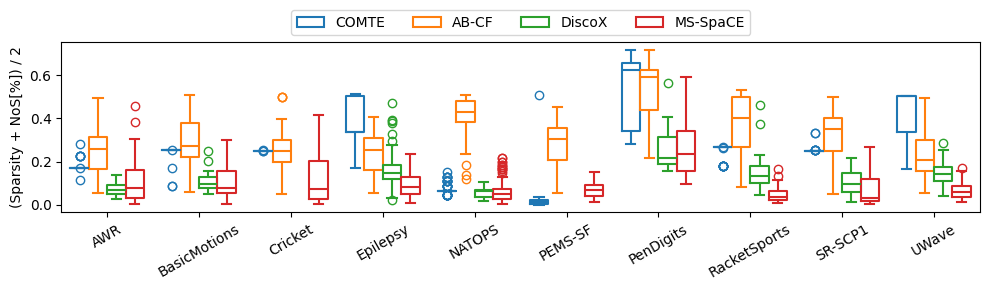

In [82]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df, x="Dataset", y="(Sparsity + NoS[%]) / 2", hue="Method", fill=False)
# ax.legend(loc='upper right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None)
ax.set(xlabel=None)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./experiments/results/multivariate-sparsity-contiguity.PNG', dpi=300)

In [87]:
datasets_trad_dict = {"CBF": "CBF", "chinatown": "Chinatown", "coffee": "Coffee", "gunpoint": "Gunpoint"}
datasets_order = dict(zip(list(datasets_trad_dict.values()), list(range(len(datasets_trad_dict)))))

metrics_trad_dict = {'nchanges': '# changes', 'sparsity': 'Sparsity', 'L1': 'Proximity ($L_1$)', 'L2': 'Proximity ($L_2$)', 'valid': 'Validity',
                     'increase_outlier_score': 'IOS', 'subsequences': 'NoS', 'subsequences %': 'NoS [%]'}

groupby_trad_dict = {'method': 'Method' , 'dataset': 'Dataset'}

metrics = list(metrics_trad_dict.values())
groupby_cols = list(groupby_trad_dict.values())

In [88]:
final_df = results_all_datasets_df.rename(columns={**metrics_trad_dict, **groupby_trad_dict})
final_df = final_df.replace(datasets_trad_dict)
final_df['Validity'] = final_df['Validity'].astype(int)

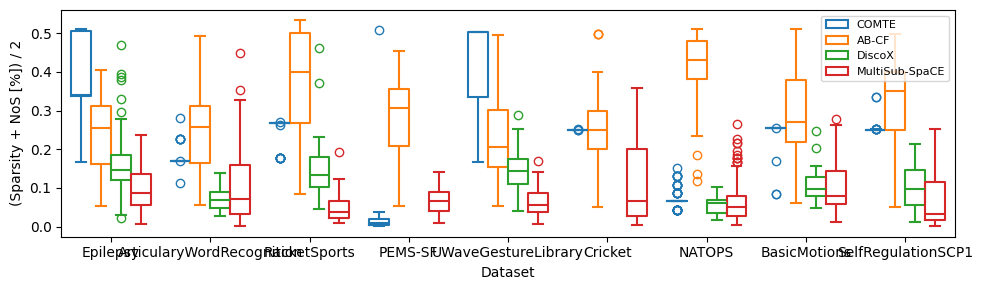

In [89]:
methods = [
    # "multisubspace_gknn_75_0_25_mut01",
    # "multisubspace_gknn_75_0_25_mut02",
    # "multisubspace_gknn_75_0_25_mut03",
    # "multisubspace_gknn_75_0_25_mut04",
    # "multisubspace_gknn_75_0_25_mut05",
    # "multisubspace_gknn_75_0_25_mut06",
    # "multisubspace_gknn_75_0_25_mut07",
    # "multisubspace_gknn_75_0_25_mut08",
    # "multisubspace_gknn_75_0_25_mut09",

    "COMTE",
    "AB-CF",
    "DiscoX",
    "MultiSub-SpaCE"
]
methods_order = dict(zip(methods, list(range(len(methods)))))

aux_df = final_df.copy()
aux_df = aux_df[aux_df['Method'].isin(methods)]
aux_df['(Sparsity + NoS [%]) / 2'] = (aux_df['Sparsity'] + aux_df['NoS [%]']) / 2
aux_df['Sparsity / NoS [%]'] = aux_df['Sparsity'] / aux_df['NoS [%]'] 
aux_df['Method_ord'] = aux_df['Method'].map( dict(zip(methods, list(range(len(methods))))) )
aux_df = aux_df.reset_index()
aux_df = aux_df.sort_values('Method_ord', ascending=True)


plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='(Sparsity + NoS [%]) / 2', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

In [20]:
times_df = pd.DataFrame()
for dataset in DATASETS:
    X_train, y_train, X_test, y_test = data_dict[dataset]
    dataset_ts_len, dataset_nchannels = X_train.shape[1], X_train.shape[2]
    dataset_times = results_all_datasets_df[results_all_datasets_df["dataset"] == dataset][['times', 'method', 'dataset']]
    dataset_times["dataset_ts_len"] = dataset_ts_len
    dataset_times["dataset_nchannels"] = dataset_nchannels
    times_df = pd.concat([times_df, dataset_times])

In [29]:
times_df.groupby(["dataset", "method"]).mean()

times  dataset_ts_len  dataset_nchannels
dataset                   method                                                         
ArticularyWordRecognition AB-CF               1.220100           144.0                9.0
                          COMTE            1133.413048           144.0                9.0
                          DiscoX           7757.671522           144.0                9.0
                          MultiSub-SpaCE     57.482149           144.0                9.0
BasicMotions              AB-CF               0.807228           100.0                6.0
                          COMTE            1138.650802           100.0                6.0
                          DiscoX            470.678741           100.0                6.0
                          MultiSub-SpaCE     33.744774           100.0                6.0
Cricket                   AB-CF               1.349016          1197.0                6.0
                          COMTE            1309.571612          1197.0                6.0
                          MultiSub-SpaCE    213.335043          1197.0                6.0
Epilepsy                  AB-CF               1.139242           206.0                3.0
                          COMTE            1447.824524           206.0                3.0
                          DiscoX            621.807469           206.0                3.0
                          MultiSub-SpaCE     46.435688           206.0                3.0
NATOPS                    AB-CF               0.978040            51.0               24.0
                          COMTE            1458.822960            51.0               24.0
                          DiscoX           1329.990589            51.0               24.0
                          MultiSub-SpaCE     36.033981            51.0               24.0
PEMS-SF                   AB-CF               6.643199           144.0              963.0
                          COMTE           16499.183486           144.0              963.0
                          DiscoX          10722.679876           144.0              963.0
                          MultiSub-SpaCE    430.642000           144.0              963.0
PenDigits                 AB-CF               2.041397             8.0                2.0
                          COMTE            1125.768259             8.0                2.0
                          DiscoX            108.319166             8.0                2.0
                          MultiSub-SpaCE     32.576587             8.0                2.0
RacketSports              AB-CF               1.360092            30.0                6.0
                          COMTE            1433.519010            30.0                6.0
                          DiscoX            281.668806            30.0                6.0
                          MultiSub-SpaCE     32.954522            30.0                6.0
SelfRegulationSCP1        AB-CF               1.482543           896.0                6.0
                          COMTE            1546.049195           896.0                6.0
                          DiscoX           1380.612363           896.0                6.0
                          MultiSub-SpaCE    102.178221           896.0                6.0
UWaveGestureLibrary       AB-CF               0.797307           315.0                3.0
                          COMTE            1463.742117           315.0                3.0
                          DiscoX           4901.369363           315.0                3.0
                          MultiSub-SpaCE     64.298068           315.0                3.0

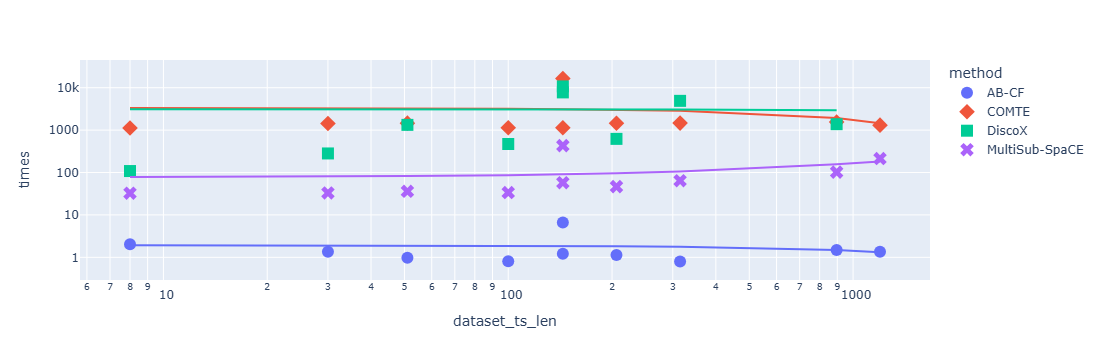

In [24]:
fig = px.scatter(
    times_df.groupby(["dataset", "method"]).mean().reset_index(), 
    x="dataset_ts_len", y="times", color="method", symbol="method", trendline="ols", log_x=True, log_y=True)
fig.update_traces(marker={'size': 12})
fig.show()

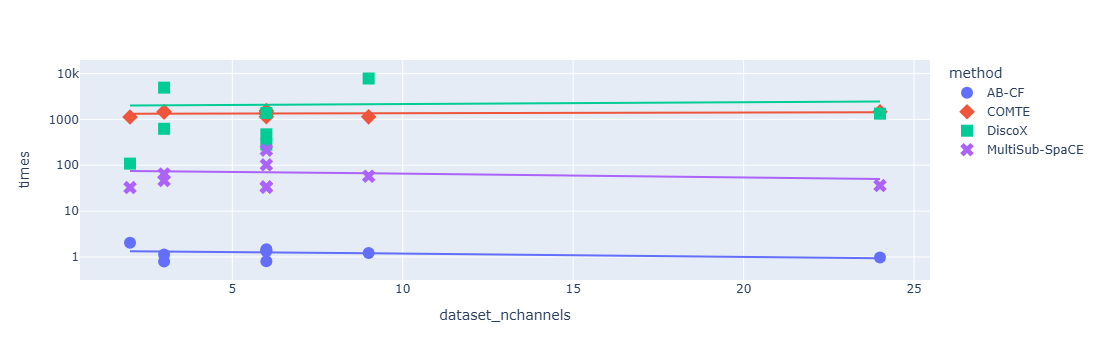

In [30]:
fig = px.scatter(
    times_df[times_df["dataset"]!="PEMS-SF"].groupby(["dataset", "method"]).mean().reset_index(), 
    x="dataset_nchannels", y="times", color="method", symbol="method", trendline="ols", log_x=False, log_y=True)
fig.update_traces(marker={'size': 12})
fig.show()

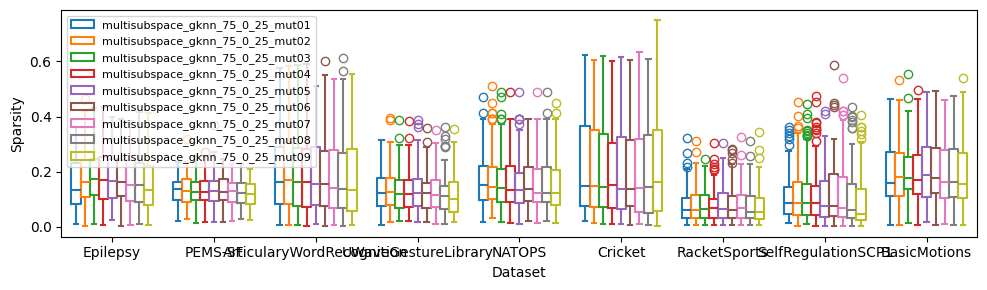

In [47]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='Sparsity', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

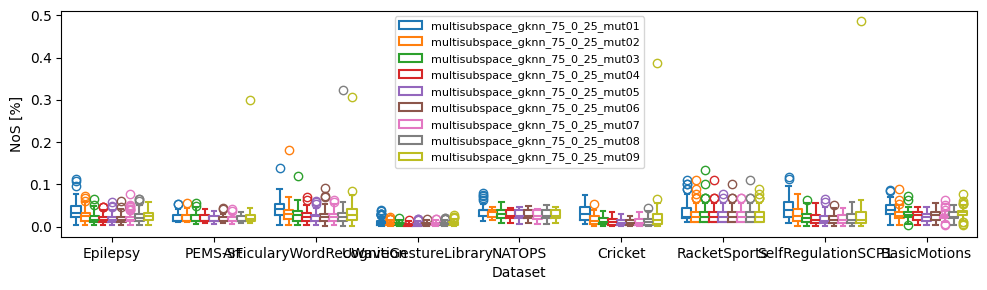

In [48]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='NoS [%]', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

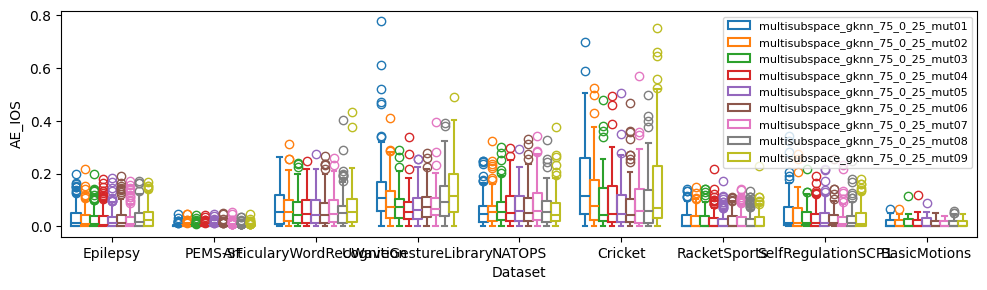

In [49]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='AE_IOS', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

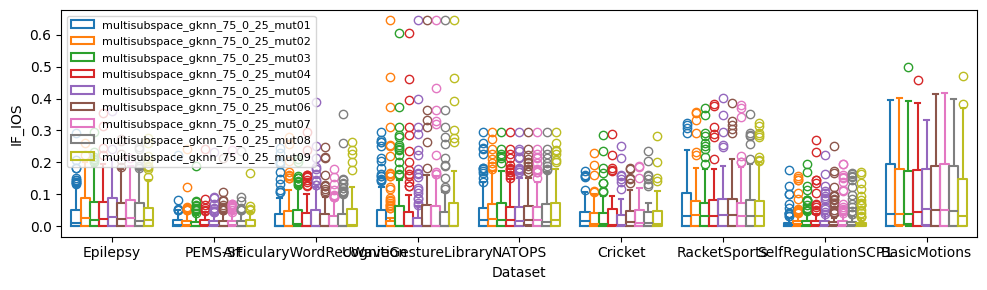

In [50]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='IF_IOS', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

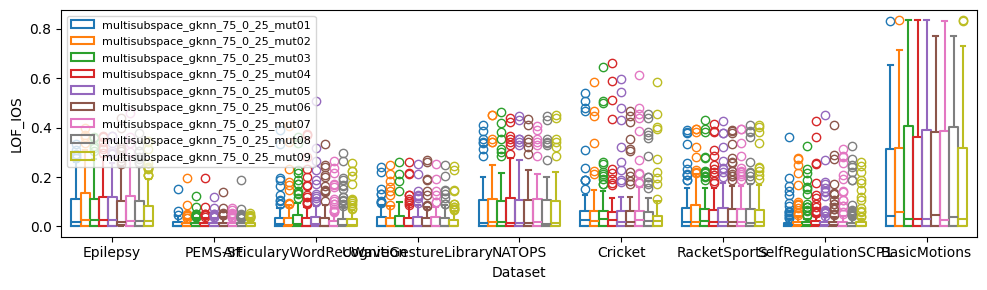

In [51]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df[aux_df["Dataset"]!="PenDigits"], x="Dataset", y='LOF_IOS', hue="Method", fill=False)
ax.legend(loc='upper right')
plt.legend(fontsize=8)
plt.tight_layout()

# Counterfactual visualization

In [138]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    fig = plt.figure(figsize=(18, grid_rows*4), dpi=600)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.2, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            """# Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')"""
            # found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            proximity_values = np.abs(x_orig - x_cf.reshape(1, length, n_channels))
            found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'./experiments/results/examples_cfs_{dataset}_instance_{instance_index}.png', dpi=600)



In [139]:
dataset = "ArticularyWordRecognition"
aux_results_dataset = results_all_datasets_df[results_all_datasets_df["dataset"]==dataset].sort_values(by="ii")

with pd.option_context("display.max_rows", None,): 
    display(aux_results_dataset[aux_results_dataset["method"]=="COMTE"])

ii  nchanges  sparsity          L1         L2     proba  valid nuns_valid     AE_OS     IF_OS  ...    AE_IOS    IF_IOS   LOF_IOS  subsequences  subsequences %        times  method best cf index  order                    dataset
0     0     432.0  0.333333  282.771898  16.859878  0.126789   True        NaN  0.501031  0.409709  ...  0.008340  0.000000  0.000000           3.0        0.004630  1297.773633   COMTE             0      2  ArticularyWordRecognition
1     3     432.0  0.333333  200.618764  11.987171  0.115451   True        NaN  0.462398  0.711085  ...  0.086672  0.000000  0.000000           3.0        0.004630  1298.750659   COMTE             0      2  ArticularyWordRecognition
2    13     432.0  0.333333  407.123807  27.893326  0.145830   True        NaN  0.679166  0.407321  ...  0.238819  0.087356  0.166106           3.0        0.004630  1294.252816   COMTE             0      2  ArticularyWordRecognition
3    14     432.0  0.333333  378.156958  24.077776  0.125990   True        NaN  0.669226  0.652983  ...  0.206618  0.058225  0.040745           3.0        0.004630  1428.913495   COMTE             0      2  ArticularyWordRecognition
4    15     432.0  0.333333  430.853773  26.737491  0.131444   True        NaN  0.622118  0.649260  ...  0.175235  0.199472  0.064234           3.0        0.004630  1308.951958   COMTE             0      2  ArticularyWordRecognition
5    19     576.0  0.444444  578.279346  32.743084  0.152591   True        NaN  0.615144  0.500176  ...  0.218123  0.104561  0.015971           4.0        0.006173  1311.643196   COMTE             0      2  ArticularyWordRecognition
6    22     432.0  0.333333  521.977933  31.427062  0.138109   True        NaN  0.464577  0.697642  ...  0.036998  0.097592  0.095484           3.0        0.004630  1299.743552   COMTE             0      2  ArticularyWordRecognition
7    23     432.0  0.333333  416.257366  26.428045  0.149637   True        NaN  0.712138  0.529105  ...  0.169132  0.151663  0.081374           3.0        0.004630  1306.371474   COMTE             0      2  ArticularyWordRecognition
8    25     432.0  0.333333  489.116896  28.688496  0.183403   True        NaN  0.671734  0.422712  ...  0.237972  0.000000  0.000000           3.0        0.004630  1381.450589   COMTE             0      2  ArticularyWordRecognition
9    29     720.0  0.555556  496.819538  23.274302  0.153824   True        NaN  0.619144  0.555616  ...  0.214400  0.000000  0.000000           5.0        0.007716  1311.790899   COMTE             0      2  ArticularyWordRecognition
10   31     432.0  0.333333  407.536926  23.136149  0.107302   True        NaN  0.532495  0.777797  ...  0.047933  0.135146  0.000000           3.0        0.004630  1415.424475   COMTE             0      2  ArticularyWordRecognition
11   40     432.0  0.333333  488.909135  29.119160  0.143188   True        NaN  0.963073  0.312245  ...  0.220263  0.031980  0.000000           3.0        0.004630  2212.554526   COMTE             0      2  ArticularyWordRecognition
12   45     432.0  0.333333  414.698432  24.586489  0.141149   True        NaN  0.912316  0.325886  ...  0.251741  0.000000  0.000000           3.0        0.004630  2218.456523   COMTE             0      2  ArticularyWordRecognition
13   46     432.0  0.333333  459.287773  26.390163  0.132516   True        NaN  0.852535  0.482922  ...  0.014216  0.000000  0.000000           3.0        0.004630  1339.542748   COMTE             0      2  ArticularyWordRecognition
14   47     432.0  0.333333  432.137762  24.908783  0.141285   True        NaN  0.785935  0.487679  ...  0.000000  0.003657  0.000000           3.0        0.004630  1335.287908   COMTE             0      2  ArticularyWordRecognition
15   51     432.0  0.333333  666.104704  36.798817  0.194359   True        NaN  1.050739  0.319198  ...  0.403303  0.100321  0.000000           3.0        0.004630  1325.081179   COMTE             0      2  ArticularyWordRecognition
16   54     576.0  0.444444  769.795694  37.

In [142]:
desired_methods = None
common_index_instance = 5

Sample 19: true class 11, x_orig predicted 11, desired_class  1


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\2241517707.py:31: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\2241517707.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\2241517707.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


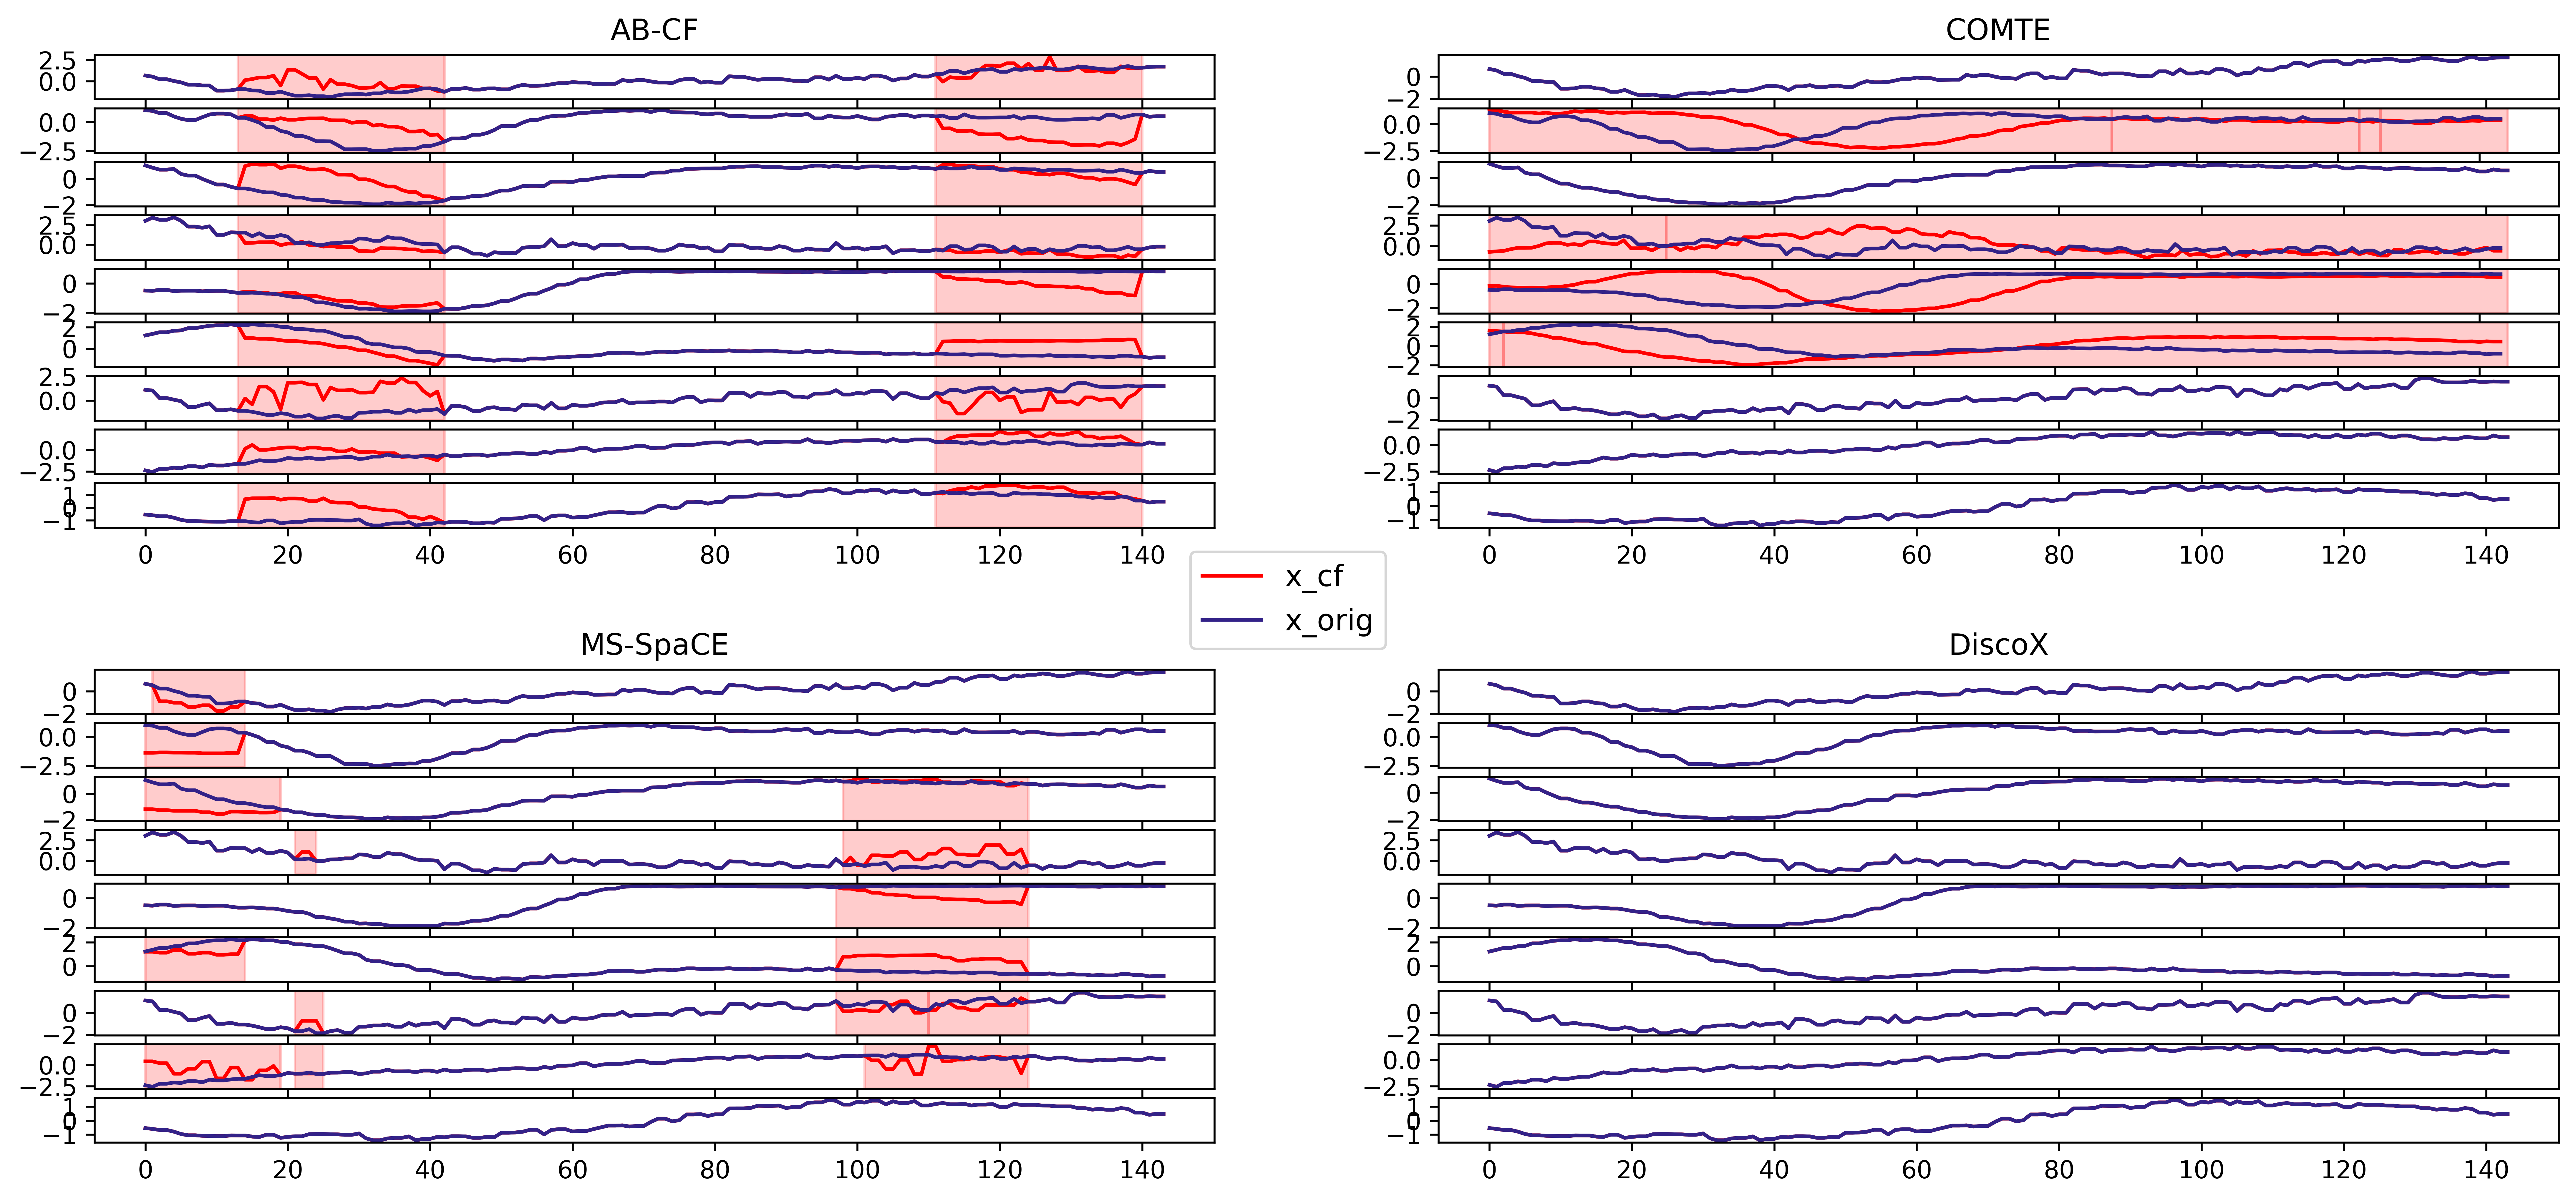

In [143]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = {}
sol_methods = methods_cfs_dict[dataset]
if desired_methods is not None:
    sol_methods = {method: solutions for method, solutions in sol_methods.items() if method in desired_methods}
for method, solutions in sol_methods.items():
    if 'cfs' in solutions[0]:
        counterfactuals = [solution['cfs'] for solution in solutions]
    else:
        counterfactuals = [solution['cf'] for solution in solutions] 
    # Extract best counterfactual in case of multi objective
    counterfactual = counterfactuals[common_index_instance]
    # Extract best index solution
    aux_results_dataset_method = aux_results_dataset[aux_results_dataset["method"] == method]
    best_cf_index = aux_results_dataset_method.iloc[common_index_instance]["best cf index"]
    best_cf = counterfactual[best_cf_index]
    best_cf = np.expand_dims(best_cf, axis=0)
    # Append to dictionary
    sol_cfs_methods[method] = best_cf
    
# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)

In [137]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


# Explore Pareto-Front

In [189]:
import json
from methods.MultiSubSpaCE.FitnessFunctions import fitness_function_mo

In [713]:
dataset = "Cricket"
method_dir_name = "d8387d902c6723a9106adc62d4fc6f327a8bd275"

In [714]:
# Load all info needed to get the counterfactual
data_tuple, original_classes, model, outlier_calculators, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names)
X_train, y_train, X_test, y_test = data_tuple

# Load solution cfs
with open(f'./experiments/results/{dataset}/{model_to_explain}/{method_dir_name}/counterfactuals.pickle', 'rb') as f:
    solutions = pickle.load(f)
    counterfactuals = [solution['cfs'] for solution in solutions]

# Load params
with open(f'./experiments/results/{dataset}/{model_to_explain}/{method_dir_name}/params.json', 'r') as json_file:
    params = json.load(json_file)
    test_indexes = params["X_test_indexes"]

# Get nuns used by the method depending on the name
if "independent_channels_nun" in params:
    if params["independent_channels_nun"]:
        nuns = possible_nuns["iknn"]
    else:
        nuns = possible_nuns["gknn"]
else:
    nuns = np.array([None]*len(X_test))

# Adapt for subsample
X_test = X_test[test_indexes]
nuns = nuns[test_indexes]
desired_classes = desired_classes[test_indexes]


In [845]:
instance = 21
# instance = 1

In [846]:
# Get x, x' and y'
counterfactuals_i = counterfactuals[instance]
x_orig_i = X_test[instance]
nun_i = nuns[instance]
desired_class = desired_classes[instance]

# Calculate objective values
predicted_probs = model.predict(counterfactuals_i, verbose=0)
# Get outlier scores from AE to get the best CF
if outlier_calculators is not None:
    aux_outlier_scores = outlier_calculators["AE"].get_outlier_scores(counterfactuals_i)
else:
    aux_outlier_scores = np.zeros((predicted_probs.shape[0], 1))
# Get fitness scores
change_masks = (counterfactuals_i != x_orig_i).astype(int)
objective_fitness = fitness_function_mo(
    change_masks, predicted_probs, desired_class, aux_outlier_scores,
    outlier_calculators["AE"].get_outlier_scores(x_orig_i)[0], 100
)
objective_fitness_df = pd.DataFrame(objective_fitness, columns=["adversarial", "sparsity", "NoS", "IOS"])
objective_fitness_df = objective_fitness_df.reset_index()

In [847]:
# objective_front = ["sparsity", "adversarial"]
# objective_front = ["sparsity", "NoS"]
objective_front = ["IOS", "sparsity"]

In [848]:
from methods.MultiSubSpaCE.MOEvolutionaryOptimizers import IntegratedPruningNSubsequenceEvolutionaryOptimizer
fronts = IntegratedPruningNSubsequenceEvolutionaryOptimizer.fast_non_dominated_sorting(objective_fitness_df[objective_front].values)

for front, front_indexes in enumerate(fronts):
    objective_fitness_df.loc[objective_fitness_df["index"].isin(front_indexes), "front"] = int(front)
filt_objective_fitness_df = objective_fitness_df.astype({'front': 'int32'})
filt_objective_fitness_df = filt_objective_fitness_df[filt_objective_fitness_df["front"]<1]
filt_objective_fitness_df = filt_objective_fitness_df.sort_values(by=objective_front[0], ascending=False)

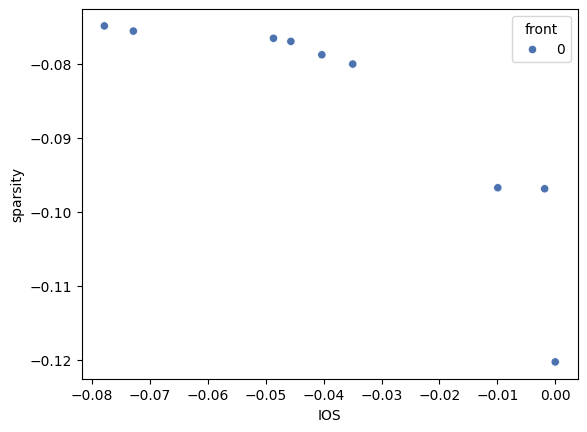

In [849]:
g = sns.scatterplot(data=filt_objective_fitness_df, x=objective_front[0], y=objective_front[1], hue="front", palette="deep")

In [850]:
ilocs = [0, len(filt_objective_fitness_df) // 2, -1]
filt_objective_fitness_df = filt_objective_fitness_df.iloc[ilocs]
filt_objective_fitness_df = filt_objective_fitness_df.drop_duplicates()
index_to_plot = filt_objective_fitness_df["index"].values

In [851]:
def plot_front_cfs(x_orig, front_cfs):
    
    # Calculate auxiliary variables
    x_cfs = front_cfs
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    grid_columns = 1
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    fig = plt.figure(figsize=(8, grid_rows*3))
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.2, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            """# Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')"""
            # found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            proximity_values = np.abs(x_orig - x_cf.reshape(1, length, n_channels))
            found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.axis('off')
            # Set title if first channel
            if i == 0:
                ax.set_title(m)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    """fig.legend(
        sub_channel_axs,     # The line objects
        labels=['x_cf', 'x_orig'],   # The labels for each line
        loc='upper right',
        prop={'size': 12}
    )"""
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'./experiments/results/examples_cfs_{dataset}_instance_{instance_index}.png', dpi=600)



C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\3876543452.py:28: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\3876543452.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


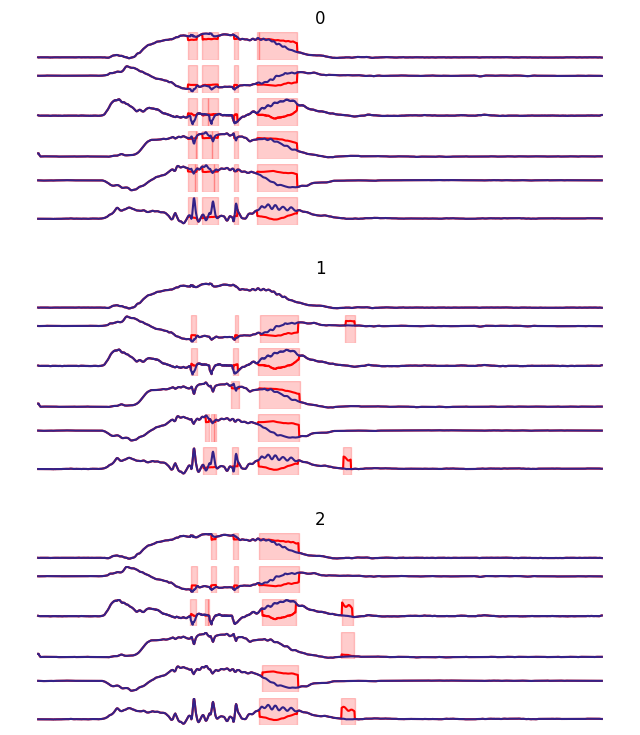

In [852]:
front_cfs = counterfactuals_i[index_to_plot]
plot_front_cfs(x_orig_i, front_cfs)

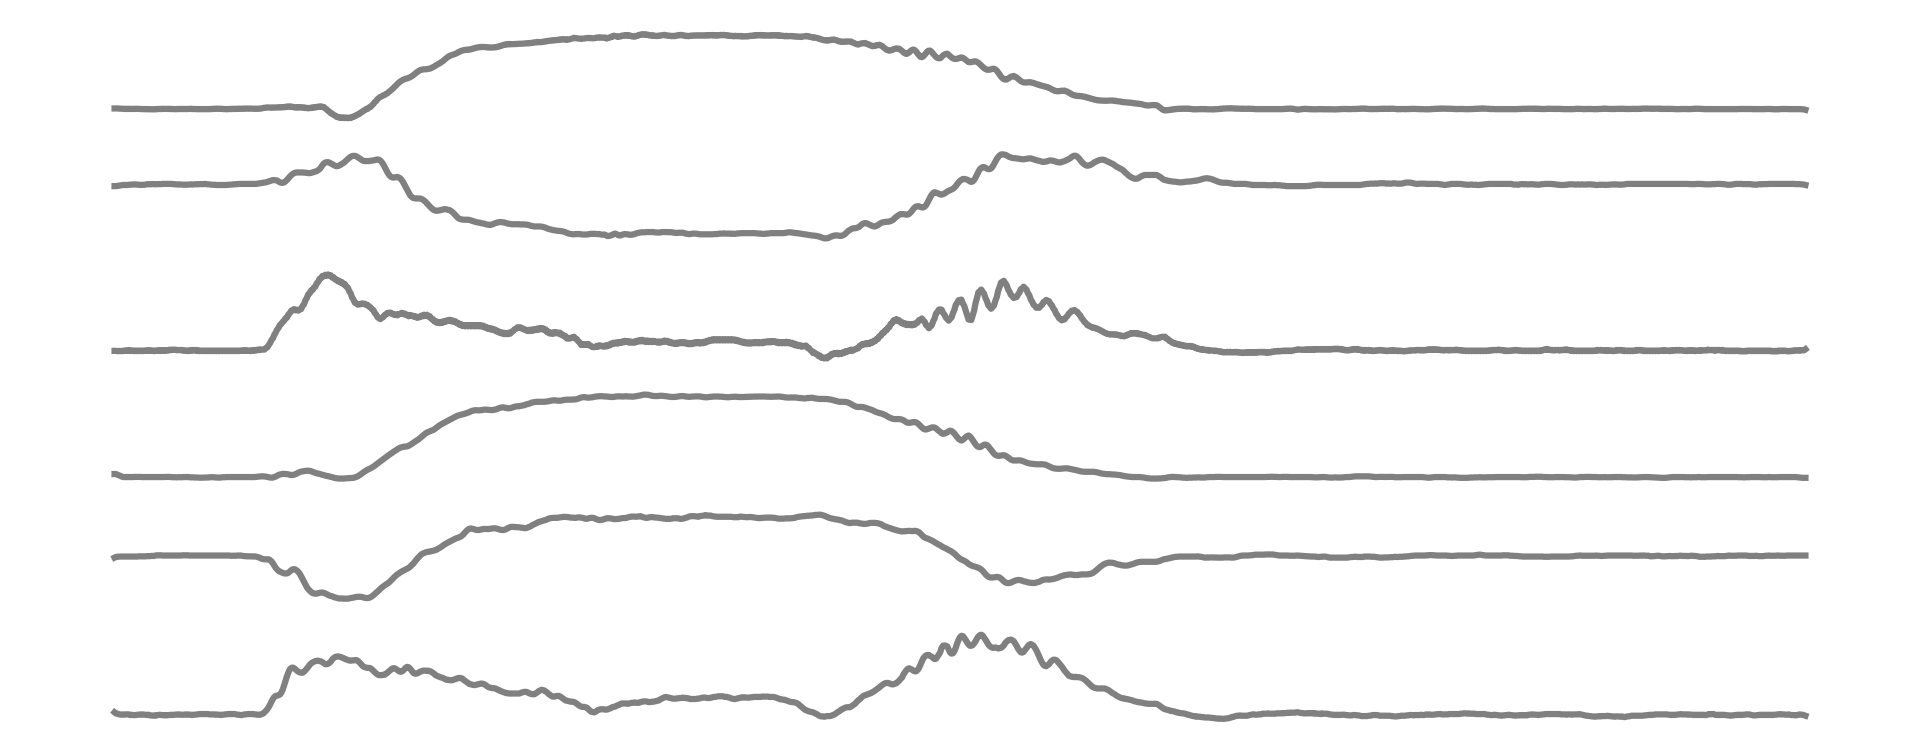

In [803]:
length = x_orig_i.shape[0]
n_channels = x_orig_i.shape[1]

fig = plt.figure(figsize=(8, 3), dpi=300)
grid = gridspec.GridSpec(n_channels, 1, wspace=0.2, hspace=0.3)
for i in range(n_channels):
    ax = plt.Subplot(fig, grid[i])
    # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
    ax.plot(nun_i.reshape(1, length, n_channels)[:, :, i].flatten(), color="grey")
    ax.set_yticklabels([])
    ax.axis('off')
    fig.add_subplot(ax)
plt.show()

C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_13368\2757957680.py:8: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig_i)/proximity_values*0.0001).astype(int)


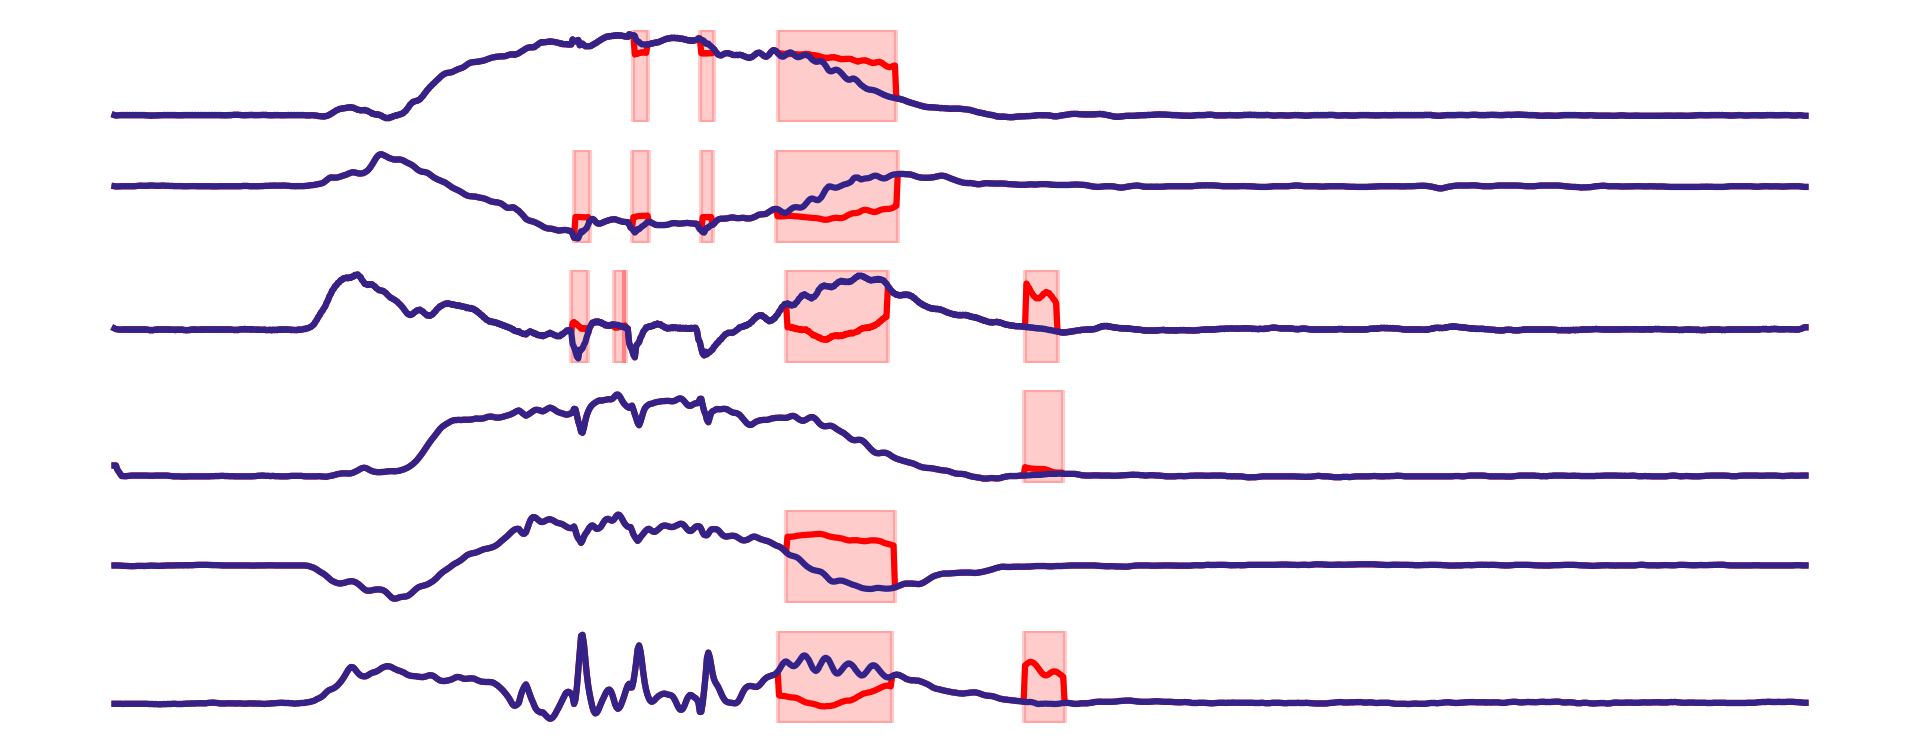

In [814]:
length = x_orig_i.shape[0]
n_channels = x_orig_i.shape[1]

x_cf = front_cfs[2]


proximity_values = np.abs(x_orig_i - x_cf.reshape(1, length, n_channels))
found_counterfactual_mask = (proximity_values > np.abs(x_orig_i)/proximity_values*0.0001).astype(int)
diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)



fig = plt.figure(figsize=(8, 3), dpi=300)
grid = gridspec.GridSpec(n_channels, 1, wspace=0.2, hspace=0.3)
for i in range(n_channels):
    ax = plt.Subplot(fig, grid[i])
    # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
    ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
    ax.plot(x_orig_i.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
    ax.set_yticklabels([])
    
    # Add fill to changes
    starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
    ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
    # Iterate over the mask segments and fill them with red color
    for i in range(0, len(starts)):
        start_idx = starts[i]
        end_idx = ends[i]
        # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
    
    # Add ax to list of subplots
    ax.axis('off')
    fig.add_subplot(ax)
plt.show()